In [1]:
import pandas as pd
import numpy as np

In [2]:
churn_df = pd.read_csv("C://Users//Sudha//OneDrive//Documents//GitHub//Projects//customer churn prediction//data//WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Convert 'TotalCharges' column to numeric
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

# Check the data types again
print(churn_df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [4]:
gender_mapping = {'Male' : 0 , 'Female' : 1}
# churn_df['gender'] = pd.to_numeric(churn_df['gender'], errors='coerce')
churn_df['gender'] = churn_df['gender'].map(gender_mapping)
Phone_mapping = {'No' : 0 , 'Yes' : 1}
churn_df['PhoneService'] = churn_df['PhoneService'].map(Phone_mapping)
churn_df['Partner'] = churn_df['Partner'].map(Phone_mapping)

In [5]:
print(churn_df.dtypes)

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents           object
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [6]:
x = churn_df[['gender','Partner','tenure','PhoneService','MonthlyCharges']]
x[0:5]

,gender,Partner,tenure,PhoneService,MonthlyCharges
0,1,1,1,0,29.85
1,0,0,34,1,56.95
2,0,0,2,1,53.85
3,0,0,45,0,42.30
4,1,0,2,1,70.70


In [7]:
y = churn_df[['Churn']]
y['Churn']=y['Churn'].map(Phone_mapping)
y[0:5]

C:\Users\Sudha\AppData\Local\Temp\ipykernel_2760\2883555270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn']=y['Churn'].map(Phone_mapping)


,Churn
0,0
1,0
2,1
3,0
4,1


In [8]:
# x['gender']= x['gender'].map(gender_mapping)
x = np.asarray(x)
x[0:5]

array([[ 1.  ,  1.  ,  1.  ,  0.  , 29.85],
       [ 0.  ,  0.  , 34.  ,  1.  , 56.95],
       [ 0.  ,  0.  ,  2.  ,  1.  , 53.85],
       [ 0.  ,  0.  , 45.  ,  0.  , 42.3 ],
       [ 1.  ,  0.  ,  2.  ,  1.  , 70.7 ]])

In [9]:
y = np.asarray(y)
y[0:5]

array([[0],
       [0],
       [1],
       [0],
       [1]], dtype=int64)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [11]:
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 1.00955867,  1.03453023, -1.27744458, -3.05401039, -1.16032292],
       [-0.99053183, -0.96662231,  0.06632742,  0.32743831, -0.25962894],
       [-0.99053183, -0.96662231, -1.23672422,  0.32743831, -0.36266036],
       [-0.99053183, -0.96662231,  0.51425142, -3.05401039, -0.74653546],
       [ 1.00955867, -0.96662231, -1.23672422,  0.32743831,  0.19736523]])

In [12]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
# Train the logistic regression model
LR = LogisticRegression(C=0.01,solver='liblinear')
LR.fit(x_train, y_train)

c:\Users\Sudha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

In [14]:
y_predict = LR.predict(x_test)

In [15]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict ,pos_label=0)

0.7630736392742796

In [16]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_predict, labels=[1,0]))

[[ 239  335]
 [ 109 1430]]


Confusion matrix, without normalization
[[ 239  335]
 [ 109 1430]]


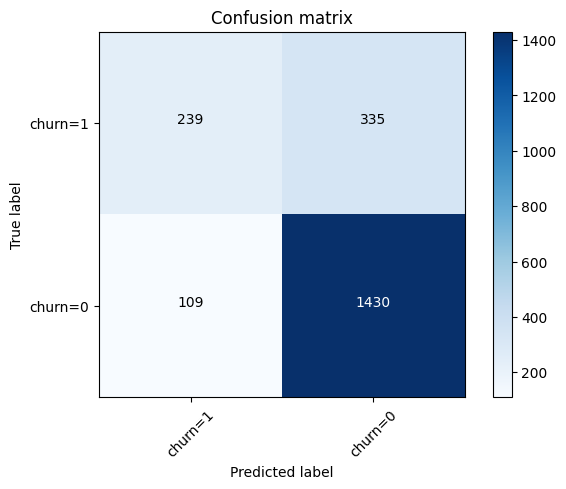

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7898722195929957
